In [3]:
from dotenv import load_dotenv
load_dotenv()
from langchain.chat_models import init_chat_model

model = init_chat_model(
    model="llama-3.1-8b-instant",
    model_provider="groq"
)


d:\AgenticAI\LangchainPractice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_community.tools import WikipediaQueryRun,ArxivQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_tavily import TavilySearch

arxiv_api = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
wiki_api = WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=500)

arxiv = ArxivQueryRun(api_wrapper=arxiv_api)
wiki = WikipediaQueryRun(api_wrapper=wiki_api)
tavily = TavilySearch()


d:\AgenticAI\LangchainPractice\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "output_schema" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]
d:\AgenticAI\LangchainPractice\.venv\Lib\site-packages\langchain_tavily\tavily_research.py:97: UserWarning: Field name "stream" in "TavilyResearch" shadows an attribute in parent "BaseTool"
  class TavilyResearch(BaseTool):  # type: ignore[override, override]


In [6]:
def add(a:int,b:int)->int:
    """Adds two numbers"""
    return a+b

def multiply(a:int,b:int)->int:
    """Multiplies two numbers"""
    return a*b

def divide(a:int,b:int)->int:
    """Divides two numbers"""
    return a/b

In [13]:
tools = [wiki,arxiv,tavily,add,multiply,divide]

llm_tool = model.bind_tools(tools)

In [14]:
from typing_extensions import TypedDict
from typing import Annotated,List
from langgraph.graph import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]

In [15]:
def superbot(state:State):
    print("Superbot node has been Called")
    return {"messages":[llm_tool.invoke(state["messages"])]}

In [21]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition

## Define the Graph
graph = StateGraph(State)

## Define the nodes
graph.add_node("superbot",superbot)
graph.add_node("tools",ToolNode(tools))

## Define the edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",tools_condition("tools"))
graph.add_edge("superbot",END)

## Compile the Graph
graph_builder = graph.compile()

# Draw the Graph
display(Image(graph_builder.get_graph().draw_mermaid_png()))

ValueError: No messages found in input state to tool_edge: tools

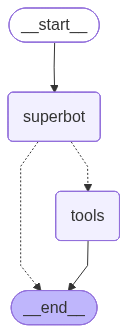

In [22]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

graph = StateGraph(State)

# Nodes
graph.add_node("superbot", superbot)
graph.add_node("tools", ToolNode(tools))

# Edges
graph.add_edge(START, "superbot")

# ✅ CONDITIONAL edge
graph.add_conditional_edges(
    "superbot",
    tools_condition,
    {
        "tools": "tools",
        END: END
    }
)

# Tool → back to model
graph.add_edge("superbot",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [26]:
graph_builder.invoke(
    {
        "messages":"1706.03762 ?"
    }
)

Superbot node has been Called


{'messages': [HumanMessage(content='1706.03762 ?', additional_kwargs={}, response_metadata={}, id='c708a2af-2726-4bbf-a2fe-25d5570df655'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '4cj5dv0mw', 'function': {'arguments': '{"query":"1706.03762"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 2114, 'total_tokens': 2133, 'completion_time': 0.037848201, 'completion_tokens_details': None, 'prompt_time': 0.180183644, 'prompt_tokens_details': None, 'queue_time': 0.070988375, 'total_time': 0.218031845}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbaf8-fc09-72f3-86da-726edaedabff-0', tool_calls=[{'name': 'arxiv', 'args': {'query': '1706.03762'}, 'id': '4cj5dv0mw', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 2114, 'ou